In [3]:
import platform
print(platform.platform())

import tensorflow as tf
print(tf.__version__)

Linux-4.4.59+-x86_64-with-Ubuntu-18.04-bionic
2.0.0


In [4]:
rand = tf.random.uniform([1],0,1)
print(rand)
rand = tf.random.uniform([4],0,1)
print(rand)
rand = tf.random.normal([4],0,1)
print(rand)

tf.Tensor([0.4484079], shape=(1,), dtype=float32)
tf.Tensor([0.93157256 0.7241032  0.74604225 0.7179514 ], shape=(4,), dtype=float32)
tf.Tensor([ 0.8829009   0.21164769  1.1252137  -2.03052   ], shape=(4,), dtype=float32)


In [5]:
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [6]:
# 3.11 뉴런의 입력과 출력 정의
x = 1
y = 0
w = tf.random.normal([1],0,1)
output = sigmoid(x * w)
print(output)

0.36871806637115645


In [7]:
# 3.12 경사 하강법을 이용한 뉴런의 학습
for i in range(1000):
    output = sigmoid(x * w)
    error = y - output
    w = w + x * 0.1 * error
    
    if i % 100 == 99:
        print(i, error, output)

99 -0.09153520356935792 0.09153520356935792
199 -0.049282534464536225 0.049282534464536225
299 -0.033437889976873324 0.033437889976873324
399 -0.025233216637275617 0.025233216637275617
499 -0.02023653987088677 0.02023653987088677
599 -0.0168805110531538 0.0168805110531538
699 -0.014473574224890384 0.014473574224890384
799 -0.012664174607913845 0.012664174607913845
899 -0.011255004230821585 0.011255004230821585
999 -0.010126811736071377 0.010126811736071377


In [8]:
# 3.13 x=0 일 때 y=1 을 얻는 뉴런의 학습
x = 0
y = 1
w = tf.random.normal([1],0,1)

for i in range(1000):
    output = sigmoid(x * w)
    error = y - output
    w = w + x * 0.1 * error
    
    if i % 100 == 99:
        print(i, error, output)

99 0.5 0.5
199 0.5 0.5
299 0.5 0.5
399 0.5 0.5
499 0.5 0.5
599 0.5 0.5
699 0.5 0.5
799 0.5 0.5
899 0.5 0.5
999 0.5 0.5


In [9]:
# 3.14 x=0 일 때 y=1 을 얻는 뉴런의 학습에 편향을 더함
x = 0
y = 1
w = tf.random.normal([1],0,1)
b = tf.random.normal([1],0,1)

for i in range(1000):
    output = sigmoid(x * w + 1 * b)
    error = y - output
    w = w + x * 0.1 * error
    b = b + 1 * 0.1 * error
    
    if i % 100 == 99:
        print(i, error, output)

99 0.10995976032710819 0.8900402396728918
199 0.05444813816671168 0.9455518618332883
299 0.035781081479486776 0.9642189185205132
399 0.02655689149599383 0.9734431085040062
499 0.021083645361246517 0.9789163546387535
599 0.017467934691981157 0.9825320653080188
699 0.014904382229843027 0.985095617770157
799 0.012993408496523307 0.9870065915034767
899 0.011514676400647628 0.9884853235993524
999 0.010336768400336926 0.9896632315996631


In [10]:
# 3.15 True, False 의 정수값 확인
print(int(True))
print(int(False))

1
0


In [11]:
# 3.16 첫번째 신경망 네트워크 : AND
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[1], [0], [0], [0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w)+b_x*b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 199:
        print(i, error_sum)

199 -0.09695546187752256
399 -0.06073359230242077
599 -0.04407831322045265
799 -0.03449951687237378
999 -0.028293534037763565
1199 -0.023954068803304095
1399 -0.020754841005386597
1599 -0.018300090361425554
1799 -0.016360058611608514
1999 -0.014787172024334622


In [12]:
# 3.17 파이썬에서 리스트에 정수를 곱하기
print([1,2,3]*2)
print([1,2,3]*0)
print([1,2,3]*-1)

[1, 2, 3, 1, 2, 3]
[]
[]


In [13]:
# 3.18 파이썬에서 리스트에 실수를 곱하기
# print([1,2,3]*0.01)

In [14]:
# 3.19 넘파이 array 에 정수, 실수를 곱하기
import numpy as np
print(np.array([1,2,3])*2)
print(np.array([1,2,3])*0)
print(np.array([1,2,3])*-1)
print(np.array([1,2,3])*0.01)

[2 4 6]
[0 0 0]
[-1 -2 -3]
[0.01 0.02 0.03]


In [15]:
# 3.20 AND 네트워크의 평가
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [1] Output: 0.9654808778868247
X: [1 0] Y: [0] Output: 0.02446556088011716
X: [0 1] Y: [0] Output: 0.024539233463918054
X: [0 0] Y: [0] Output: 2.2556412387937118e-05


In [16]:
# 3.21 두번째 신경망 네트워크 : OR
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[1], [1], [1], [0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w)+b_x*b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 199:
        print(i, error_sum)

199 -0.05408462317245302
399 -0.027106602282075953
599 -0.017957535667555313
799 -0.013375102571279898
999 -0.010634944559211774
1199 -0.008816820000079065
1399 -0.007524770405265863
1599 -0.006559974209926649
1799 -0.005812840086402805
1999 -0.005216401405334602


In [17]:
# 3.22 OR 네트워크의 평가
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [1] Output: 0.9999970949133011
X: [1 0] Y: [1] Output: 0.9896539006876007
X: [0 1] Y: [1] Output: 0.9896403482365771
X: [0 0] Y: [0] Output: 0.025859580700461657


In [18]:
# 3.23 세번째 신경망 네트워크 : XOR
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[0], [1], [1], [0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w)+b_x*b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 199:
        print(i, error_sum)

199 -0.0006287301593027594
399 -2.5571154885439817e-05
599 -1.0396034710868918e-06
799 -4.653552321265408e-09
999 3.722842145670313e-09
1199 3.722842145670313e-09
1399 3.722842145670313e-09
1599 3.722842145670313e-09
1799 3.722842145670313e-09
1999 3.722842145670313e-09


In [19]:
# 3.24 XOR 네트워크의 평가
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))
    
# 3.25 XOR 네트워크의 w, b 값 확인
print('w:', w)
print('b:', b)

X: [1 1] Y: [0] Output: 0.5128176286712095
X: [1 0] Y: [1] Output: 0.5128176305326305
X: [0 1] Y: [1] Output: 0.4999999990686774
X: [0 0] Y: [0] Output: 0.5000000009313226
w: tf.Tensor([ 5.1281754e-02 -7.4505806e-09], shape=(2,), dtype=float32)
b: tf.Tensor([3.7252903e-09], shape=(1,), dtype=float32)


In [22]:
# 3.26 AND 네트워크의 w, b 값 확인
# w: tf.Tensor([6.9484286 6.951607 ], shape=(2,), dtype=float32)
# b: tf.Tensor([-10.601849], shape=(1,), dtype=float32)


In [21]:
# 3.27 tf.keras 를 이용한 XOR 네트워크 계산
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[0], [1], [1], [0]])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.3), loss='mse')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [24]:
# 3.28 tf.keras 를 이용한 XOR 네트워크 학습
history = model.fit(x, y, epochs=2000, batch_size=100)

Train on 4 samples
Epoch 1/2000
4/4 [==============================] - 0s 97ms/sample - loss: 0.0043
Epoch 2/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0043
Epoch 3/2000
4/4 [==============================] - 0s 984us/sample - loss: 0.0042
Epoch 4/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0042
Epoch 5/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0042
Epoch 6/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0042
Epoch 7/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0042
Epoch 8/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0042
Epoch 9/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0042
Epoch 10/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0042
Epoch 11/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0042
Epoch 12/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0042
Epo

Epoch 101/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0042
Epoch 102/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0042
Epoch 103/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0041
Epoch 104/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0041
Epoch 105/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0041
Epoch 106/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0041
Epoch 107/2000
4/4 [==============================] - 0s 949us/sample - loss: 0.0041
Epoch 108/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0041
Epoch 109/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0041
Epoch 110/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0041
Epoch 111/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0041
Epoch 112/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0041
Ep

Epoch 200/2000
4/4 [==============================] - 0s 929us/sample - loss: 0.0041
Epoch 201/2000
4/4 [==============================] - 0s 942us/sample - loss: 0.0041
Epoch 202/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0041
Epoch 203/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0041
Epoch 204/2000
4/4 [==============================] - 0s 986us/sample - loss: 0.0041
Epoch 205/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0041
Epoch 206/2000
4/4 [==============================] - 0s 986us/sample - loss: 0.0041
Epoch 207/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0040
Epoch 208/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0040
Epoch 209/2000
4/4 [==============================] - 0s 971us/sample - loss: 0.0040
Epoch 210/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0040
Epoch 211/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0

Epoch 299/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0040
Epoch 300/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0040
Epoch 301/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0040
Epoch 302/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0040
Epoch 303/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0040
Epoch 304/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0040
Epoch 305/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0040
Epoch 306/2000
4/4 [==============================] - 0s 992us/sample - loss: 0.0040
Epoch 307/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0040
Epoch 308/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0040
Epoch 309/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0040
Epoch 310/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0040
Ep

4/4 [==============================] - 0s 1ms/sample - loss: 0.0039
Epoch 398/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0039
Epoch 399/2000
4/4 [==============================] - 0s 912us/sample - loss: 0.0039
Epoch 400/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0039
Epoch 401/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0039
Epoch 402/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0039
Epoch 403/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0039
Epoch 404/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0039
Epoch 405/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0039
Epoch 406/2000
4/4 [==============================] - 0s 953us/sample - loss: 0.0039
Epoch 407/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0039
Epoch 408/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0039
Epoch 409/2000


Epoch 496/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0038
Epoch 497/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0038
Epoch 498/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0038
Epoch 499/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0038
Epoch 500/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0038
Epoch 501/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0038
Epoch 502/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0038
Epoch 503/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0038
Epoch 504/2000
4/4 [==============================] - 0s 982us/sample - loss: 0.0038
Epoch 505/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0038
Epoch 506/2000
4/4 [==============================] - 0s 933us/sample - loss: 0.0038
Epoch 507/2000
4/4 [==============================] - 0s 952us/sample - loss: 0.003

Epoch 595/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0037
Epoch 596/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0037
Epoch 597/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0037
Epoch 598/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0037
Epoch 599/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0037
Epoch 600/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0037
Epoch 601/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0037
Epoch 602/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0037
Epoch 603/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0037
Epoch 604/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0037
Epoch 605/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0037
Epoch 606/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0037
Epoc

4/4 [==============================] - 0s 1ms/sample - loss: 0.0036
Epoch 694/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0036
Epoch 695/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0036
Epoch 696/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0036
Epoch 697/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0036
Epoch 698/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0036
Epoch 699/2000
4/4 [==============================] - 0s 959us/sample - loss: 0.0036
Epoch 700/2000
4/4 [==============================] - 0s 940us/sample - loss: 0.0036
Epoch 701/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0036
Epoch 702/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0036
Epoch 703/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0036
Epoch 704/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0036
Epoch 705/2000


Epoch 792/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0036
Epoch 793/2000
4/4 [==============================] - 0s 957us/sample - loss: 0.0036
Epoch 794/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0036
Epoch 795/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0036
Epoch 796/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0036
Epoch 797/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0036
Epoch 798/2000
4/4 [==============================] - 0s 955us/sample - loss: 0.0036
Epoch 799/2000
4/4 [==============================] - 0s 988us/sample - loss: 0.0036
Epoch 800/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0036
Epoch 801/2000
4/4 [==============================] - 0s 924us/sample - loss: 0.0036
Epoch 802/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0036
Epoch 803/2000
4/4 [==============================] - 0s 911us/sample - loss: 0

4/4 [==============================] - 0s 1ms/sample - loss: 0.0035
Epoch 891/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0035
Epoch 892/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0035
Epoch 893/2000
4/4 [==============================] - 0s 958us/sample - loss: 0.0035
Epoch 894/2000
4/4 [==============================] - 0s 998us/sample - loss: 0.0035
Epoch 895/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0035
Epoch 896/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0035
Epoch 897/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0035
Epoch 898/2000
4/4 [==============================] - 0s 983us/sample - loss: 0.0035
Epoch 899/2000
4/4 [==============================] - 0s 941us/sample - loss: 0.0035
Epoch 900/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0035
Epoch 901/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0035
Epoch 902/2

Epoch 989/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0034
Epoch 990/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0034
Epoch 991/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0034
Epoch 992/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0034
Epoch 993/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0034
Epoch 994/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0034
Epoch 995/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0034
Epoch 996/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0034
Epoch 997/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0034
Epoch 998/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0034
Epoch 999/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0034
Epoch 1000/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0034
Epo

Epoch 1087/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0034
Epoch 1088/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0034
Epoch 1089/2000
4/4 [==============================] - 0s 999us/sample - loss: 0.0034
Epoch 1090/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0034
Epoch 1091/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0034
Epoch 1092/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0034
Epoch 1093/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0034
Epoch 1094/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0034
Epoch 1095/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0034
Epoch 1096/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0034
Epoch 1097/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0034
Epoch 1098/2000
4/4 [==============================] - 0s 1ms/sample - los

Epoch 1185/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0033
Epoch 1186/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0033
Epoch 1187/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0033
Epoch 1188/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0033
Epoch 1189/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0033
Epoch 1190/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0033
Epoch 1191/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0033
Epoch 1192/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0033
Epoch 1193/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0033
Epoch 1194/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0033
Epoch 1195/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0033
Epoch 1196/2000
4/4 [==============================] - 0s 1ms/sample - loss:

Epoch 1282/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0032
Epoch 1283/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0032
Epoch 1284/2000
4/4 [==============================] - 0s 969us/sample - loss: 0.0032
Epoch 1285/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0032
Epoch 1286/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0032
Epoch 1287/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0032
Epoch 1288/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0032
Epoch 1289/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0032
Epoch 1290/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0032
Epoch 1291/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0032
Epoch 1292/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0032
Epoch 1293/2000
4/4 [==============================] - 0s 1ms/sample - los

Epoch 1380/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0032
Epoch 1381/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0032
Epoch 1382/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0032
Epoch 1383/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0032
Epoch 1384/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0032
Epoch 1385/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0032
Epoch 1386/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0032
Epoch 1387/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0032
Epoch 1388/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0032
Epoch 1389/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0032
Epoch 1390/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0032
Epoch 1391/2000
4/4 [==============================] - 0s 1ms/sample - loss:

Epoch 1478/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0031
Epoch 1479/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0031
Epoch 1480/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0031
Epoch 1481/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0031
Epoch 1482/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0031
Epoch 1483/2000
4/4 [==============================] - 0s 999us/sample - loss: 0.0031
Epoch 1484/2000
4/4 [==============================] - 0s 939us/sample - loss: 0.0031
Epoch 1485/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0031
Epoch 1486/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0031
Epoch 1487/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0031
Epoch 1488/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0031
Epoch 1489/2000
4/4 [==============================] - 0s 1ms/sample - l

4/4 [==============================] - 0s 1ms/sample - loss: 0.0031
Epoch 1576/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0031
Epoch 1577/2000
4/4 [==============================] - 0s 953us/sample - loss: 0.0031
Epoch 1578/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0031
Epoch 1579/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0031
Epoch 1580/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0031
Epoch 1581/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0031
Epoch 1582/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0031
Epoch 1583/2000
4/4 [==============================] - 0s 986us/sample - loss: 0.0031
Epoch 1584/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0031
Epoch 1585/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0031
Epoch 1586/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0031
Epoc

Epoch 1673/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0030
Epoch 1674/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0030
Epoch 1675/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0030
Epoch 1676/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0030
Epoch 1677/2000
4/4 [==============================] - 0s 968us/sample - loss: 0.0030
Epoch 1678/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0030
Epoch 1679/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0030
Epoch 1680/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0030
Epoch 1681/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0030
Epoch 1682/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0030
Epoch 1683/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0030
Epoch 1684/2000
4/4 [==============================] - 0s 1ms/sample - los

Epoch 1771/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0030
Epoch 1772/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0030
Epoch 1773/2000
4/4 [==============================] - 0s 992us/sample - loss: 0.0030
Epoch 1774/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0030
Epoch 1775/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0030
Epoch 1776/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0030
Epoch 1777/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.0030
Epoch 1778/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0030
Epoch 1779/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0030
Epoch 1780/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0030
Epoch 1781/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0030
Epoch 1782/2000
4/4 [==============================] - 0s 1ms/sample - los

Epoch 1869/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0029
Epoch 1870/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0029
Epoch 1871/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0029
Epoch 1872/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0029
Epoch 1873/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0029
Epoch 1874/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0029
Epoch 1875/2000
4/4 [==============================] - 0s 920us/sample - loss: 0.0029
Epoch 1876/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0029
Epoch 1877/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0029
Epoch 1878/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0029
Epoch 1879/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0029
Epoch 1880/2000
4/4 [==============================] - 0s 1ms/sample - los

Epoch 1967/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0029
Epoch 1968/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0029
Epoch 1969/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0029
Epoch 1970/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0029
Epoch 1971/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0029
Epoch 1972/2000
4/4 [==============================] - 0s 989us/sample - loss: 0.0029
Epoch 1973/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0029
Epoch 1974/2000
4/4 [==============================] - 0s 984us/sample - loss: 0.0029
Epoch 1975/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0029
Epoch 1976/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0029
Epoch 1977/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0029
Epoch 1978/2000
4/4 [==============================] - 0s 1ms/sample - l

In [25]:
# 3.29 tf.keras 를 이용한 XOR 네트워크 평가
model.predict(x)

array([[0.04632595],
       [0.94195914],
       [0.9432914 ],
       [0.05149743]], dtype=float32)

In [26]:
# 3.30 XOR 네트워크의 가중치와 편향 확인
for weight in model.weights:
    print(weight)

<tf.Variable 'dense_2/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[-5.418026 ,  6.535939 ],
       [ 5.658225 , -6.4105525]], dtype=float32)>
<tf.Variable 'dense_2/bias:0' shape=(2,) dtype=float32, numpy=array([2.7343163, 3.2931588], dtype=float32)>
<tf.Variable 'dense_3/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-6.7858944],
       [-6.657705 ]], dtype=float32)>
<tf.Variable 'dense_3/bias:0' shape=(1,) dtype=float32, numpy=array([9.878062], dtype=float32)>


In [27]:
# 3.31 간단한 꺾은선 그래프 그리기
import matplotlib.pyplot as plt
x = range(20)
y = tf.random.normal([20],0,1)
plt.plot(x,y)
plt.show()

<Figure size 640x480 with 1 Axes>

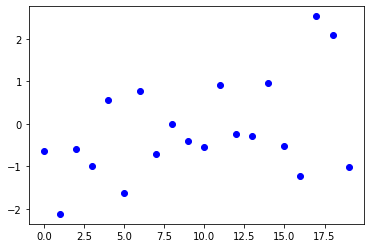

In [28]:
# 3.32 간단한 점 그래프 그리기
import matplotlib.pyplot as plt
x = range(20)
y = tf.random.normal([20],0,1)
plt.plot(x,y,'bo')
plt.show()

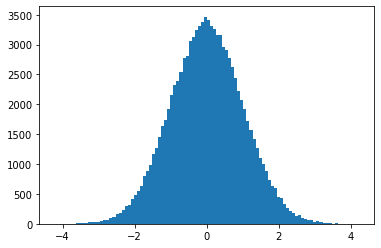

In [29]:
# 3.33 정규분포 그래프를 히스토그램으로 나타내기
import matplotlib.pyplot as plt
random_normal = tf.random.normal([100000],0,1)
plt.hist(random_normal, bins=100)
plt.show()

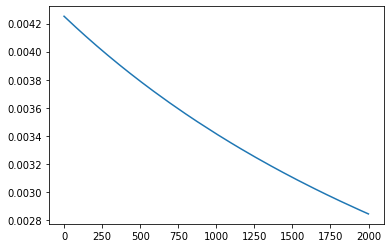

In [30]:
# 3.34 2-레이어 XOR 네트워크의 loss 변화를 선 그래프로 표시
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])